Running warmUpExercise...
5x5 Identity Matrix:
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


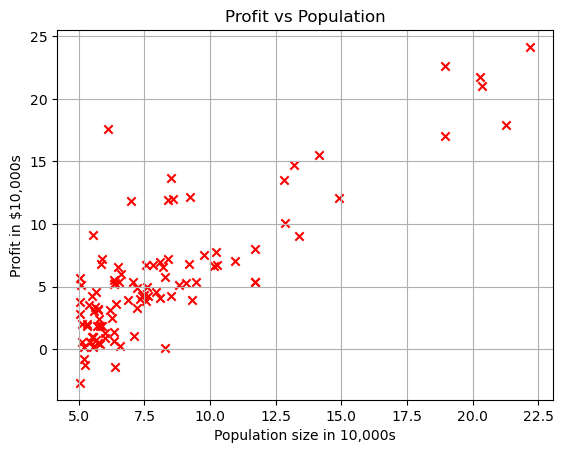


Testing the cost function...
With theta = [0 ; 0]
Cost computed = 31.02492112859069
Expected cost value (approx) 32.07
With theta = [-1 ; 2]
Cost computed = 54.93622239759068
Expected cost value (approx) 54.24
Theta found by gradient descent:
[-3.65759928  1.15870989]
Expected theta values (approx): [-3.6303, 1.1664]


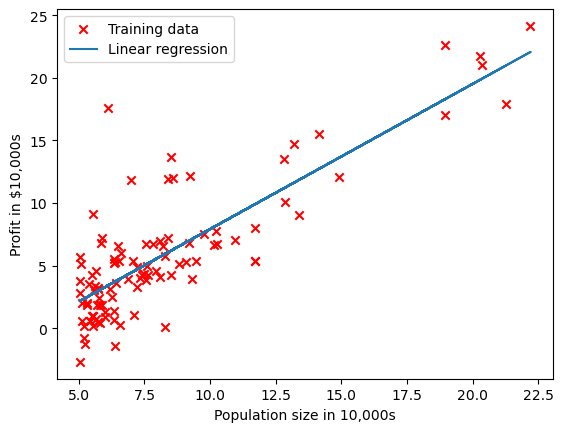

For population = 35,000, we predict a profit of $3978.85
For population = 70,000, we predict a profit of $44533.70


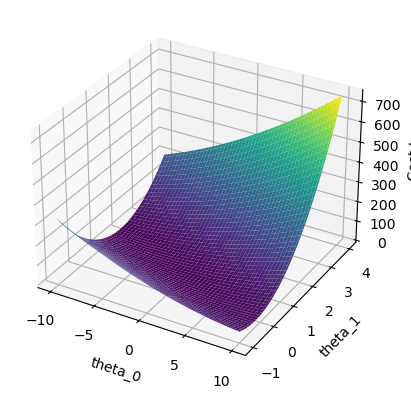

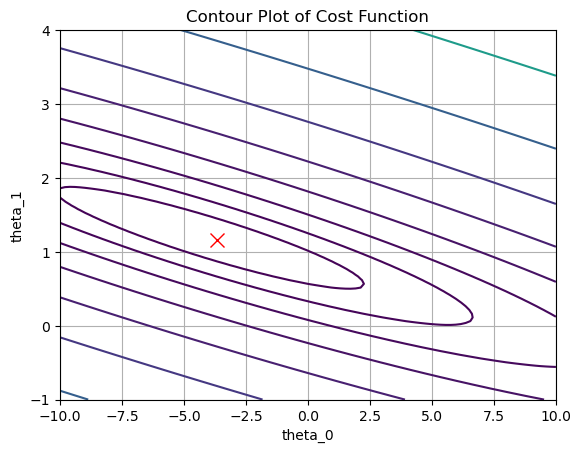

First 10 examples from the dataset:
x = [2104, 3], y = 399900
x = [1600, 3], y = 329900
x = [2400, 3], y = 369000
x = [1416, 2], y = 232000
x = [3000, 4], y = 539900
x = [1985, 4], y = 299900
x = [1534, 3], y = 314900
x = [1427, 3], y = 198999
x = [1380, 3], y = 212000
x = [1494, 3], y = 242500
Normalizing Features...


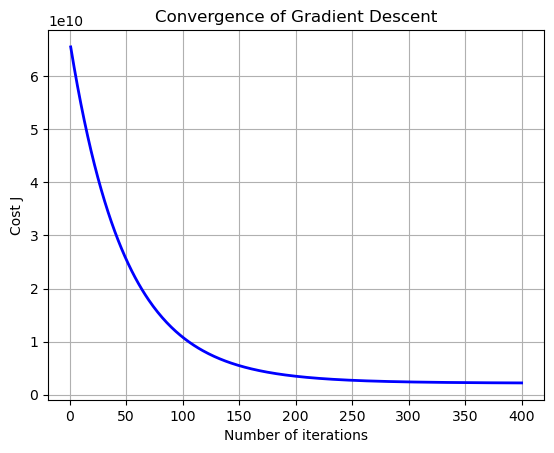

Theta computed from gradient descent:
[337388.43413601  99754.89103712   4282.48750277]
Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $289813.13
Expected price (approx): 293081.46
Theta computed from the normal equations:
[88243.79452078   139.09273704 -8205.74430671]
Predicted price of a 1650 sq-ft, 3 br house (using normal equations): $293129.58
Expected price (approx): 293081.46


In [3]:
# Importações
import numpy as np
import matplotlib.pyplot as plt
import os

# Caminho base onde estão os arquivos de dados
base_path = r'C:\Users\CCE\data'
data1_path = os.path.join(base_path, 'ex1data1.txt')
data2_path = os.path.join(base_path, 'ex1data2.txt')

# Warm-Up Exercise
def warmUpExercise():
    return np.eye(5)

print("Running warmUpExercise...")
print("5x5 Identity Matrix:")
print(warmUpExercise())

# ===== Parte 1: Regressão com 1 variável =====

# Carregar dados ex1data1.txt
data = np.loadtxt(data1_path, delimiter=',')
X = data[:, 0]  # Tamanho da população
y = data[:, 1]  # Lucro
m = len(y)

# Função para plotar os dados
def plotData(X, y):
    plt.scatter(X, y, marker='x', c='r')
    plt.xlabel('Population size in 10,000s')
    plt.ylabel('Profit in $10,000s')
    plt.title('Profit vs Population')
    plt.grid(True)
    plt.show()

plotData(X, y)

# Função de custo
def computeCost(X, y, theta):
    m = len(y)
    predictions = X @ theta
    sq_errors = (predictions - y) ** 2
    J = (1 / (2 * m)) * np.sum(sq_errors)
    return J

# Gradiente descendente
def gradientDescent(X, y, theta, alpha, iterations):
    m = len(y)
    J_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X @ theta
        errors = predictions - y
        theta = theta - (alpha / m) * (X.T @ errors)
        J_history[i] = computeCost(X, y, theta)
    
    return theta, J_history

# Adicionar coluna de 1s a X
X_with_intercept = np.column_stack((np.ones(m), X))
theta = np.zeros(2)
iterations = 1500
alpha = 0.01

# Testando a função de custo
print("\nTesting the cost function...")
J = computeCost(X_with_intercept, y, theta)
print(f"With theta = [0 ; 0]\nCost computed = {J}")
print("Expected cost value (approx) 32.07")

J = computeCost(X_with_intercept, y, np.array([-1, 2]))
print(f"With theta = [-1 ; 2]\nCost computed = {J}")
print("Expected cost value (approx) 54.24")

# Rodar gradiente descendente
theta, J_history = gradientDescent(X_with_intercept, y, theta, alpha, iterations)
print("Theta found by gradient descent:")
print(theta)
print("Expected theta values (approx): [-3.6303, 1.1664]")

# Plot linha de regressão
plt.scatter(X, y, marker='x', c='r', label='Training data')
plt.plot(X, X_with_intercept @ theta, '-', label='Linear regression')
plt.xlabel('Population size in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend()
plt.show()

# Previsões
predict1 = np.array([1, 3.5]) @ theta
predict2 = np.array([1, 7.0]) @ theta
print(f"For population = 35,000, we predict a profit of ${predict1 * 10000:.2f}")
print(f"For population = 70,000, we predict a profit of ${predict2 * 10000:.2f}")

# Visualização da função de custo J(θ)
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        t = np.array([theta0, theta1])
        J_vals[i, j] = computeCost(X_with_intercept, y, t)

# Plot de superfície
J_vals = J_vals.T
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)
ax.plot_surface(T0, T1, J_vals, cmap='viridis')
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('Cost J')
plt.show()

# Plot de contorno
plt.contour(theta0_vals, theta1_vals, J_vals, levels=np.logspace(-2, 3, 20), cmap='viridis')
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.plot(theta[0], theta[1], 'rx', markersize=10, linewidth=2)
plt.title('Contour Plot of Cost Function')
plt.grid(True)
plt.show()

# ===== Parte 2: Regressão com múltiplas variáveis =====

# Carregar dados ex1data2.txt
data = np.loadtxt(data2_path, delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = len(y)

print("First 10 examples from the dataset:")
for i in range(10):
    print(f"x = [{X[i, 0]:.0f}, {X[i, 1]:.0f}], y = {y[i]:.0f}")

# Normalizar características
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

print("Normalizing Features...")
X_norm, mu, sigma = featureNormalize(X)
X = np.column_stack((np.ones(m), X_norm))
theta = np.zeros(X.shape[1])
alpha = 0.01
num_iters = 400

# Gradiente descendente
theta, J_history = gradientDescent(X, y, theta, alpha, num_iters)

# Plot da convergência
plt.plot(range(1, len(J_history) + 1), J_history, '-b', linewidth=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Convergence of Gradient Descent')
plt.grid(True)
plt.show()

print("Theta computed from gradient descent:")
print(theta)

# Previsão para casa de 1650 sq-ft, 3 quartos
normalized_features = (np.array([1650, 3]) - mu) / sigma
normalized_features = np.insert(normalized_features, 0, 1)
price = normalized_features @ theta

print(f"Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${price:.2f}")
print("Expected price (approx): 293081.46")

# ===== Parte 3: Equações normais =====

def normalEqn(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

data = np.loadtxt(data2_path, delimiter=',')
X = data[:, :2]
y = data[:, 2]
X = np.column_stack((np.ones(len(y)), X))

theta = normalEqn(X, y)
print("Theta computed from the normal equations:")
print(theta)

price = np.array([1, 1650, 3]) @ theta
print(f"Predicted price of a 1650 sq-ft, 3 br house (using normal equations): ${price:.2f}")
print("Expected price (approx): 293081.46")
